# Examen 1: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia


El examen consta de 7 puntos, cada uno de igual valor, el uso de herramientas de IA no esta permitido. Puede usar la documentacion de scipy, numpy, matplotlib.

La entrega se realiza a través del github del curso.


#### Examen

Una esfera de masa $m$ es lanzada desde la superficie de la tierra con velocidad $\vec{v_0}$. Las fuerzas que actúan sobre la bolita son: el peso $m\vec{g}$, y la fuerza de rozamiento $\vec{f}=-mb\vec{v}_0$ que el  aire ejerce sobre la bolita. Un digrama de cuerpo libre es esquematizado en la siguiente figura.

![Movimiento parabolico](http://www.sc.ehu.es/sbweb/fisica/dinamica/stokes2/stokes1.gif)

Para dar solución al movimiento de la bolita, se debe plantear las ecuaciones de movimiento desde la segunda ley de Newton y después solucionarla para encontrar la ecuaciones de posición y velocidad. Su tarea será determinar el valor del alcance máximo para diferentes ángulos de lanzamiento. Para ello lea detenidamente lo siguiente:  

Las **ecuaciones de movimiento** de la bolita vienen dadas por:
\begin{equation}
m\frac{\mathrm{d}v_x}{\mathrm{d}t} = - mbv_x
\end{equation}


\begin{equation}
m\frac{\mathrm{d}v_y}{\mathrm{d}t} = - mg-mbv_y
\end{equation}


donde:

$v_{0x}=v_0\cos \theta$,  $v_{0y}=v_0\sin \theta$,  $b$ el coeficiente de rozamiento con el aire, y $g$ la aceleración de la gravedad


La solución a las ecuaciones anteriores para la **posición ($x$, $y$) y la velocidad ($v_x$, $v_y$)**  son:


\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}



**Alcance máximo**

El tiempo asociado al alcance máximo del proyectil se da cuando $x=R$, despejando de la ecuación para $x$ el tiempo, se tiene que:

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

Reemplanzando en la ecuación para $y$ obtenemos que:
\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

El alcance máximo R, estará deteminado cuando $y=0$ en la anterior ecuación. Notese que es una ecuación trascendental. Su tarea será determinar el valor de R para diferentes ángulos de lanzamiento, para ello realice lo siguiente:





1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$



2. Asumiento que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.


3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  


4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.

Ahora,  vamos a mostrar la trayectoria para múltiples ángulos de lanzamiento.

5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```


generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

6. Realice un gráfico de $R$ vs $t_v$

7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.













In [26]:
# Punto 1
import numpy as np
import matplotlib.pyplot as plt

def y(R,theta, v0, b, g):
    v0x=np.cos(theta)*v0
    v0y=np.sin(theta)*v0
    return (g/b+v0y)*(R/v0x)+(g/b**2)*np.log(1-(R*b)/v0x)


# Punto 2 (usando el método del punto medio)
a=250
b=350
def f(x):
    return y(x,v0=55, theta=np.pi/4, b=0.005, g=9.8)

err=1e-7

while True:
    if b-a<err:
        print(f"El valor aproximado de R es {(a+b)/2}")
        break
    c=(a+b)/2
    if f(c)==0:
        print(f"El valor de R es {c}")
        break
    elif f(c)*f(a)<0:
        b=c
    else:
        a=c


El valor aproximado de R es 300.69207665510476


In [27]:
# Punto 3 (usando el método de la secante)

x0=250
x1=350

while True:
    if abs(x1-x0)<err:
        print(f"El valor aproximado de R es {x1}")
        break
    a=x1
    x1= x1-((x1-x0)/(f(x1)-f(x0)))*f(x1)
    x0=a


El valor aproximado de R es 300.69207669317046


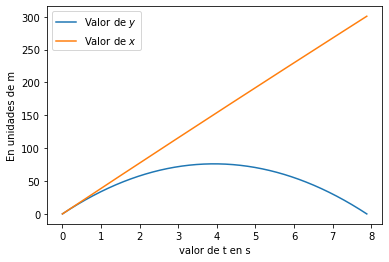

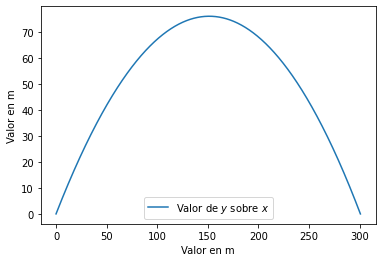

In [89]:
#Punto 4
# Aproximando el valor de R a 300.692 y el de v0x a 38.89

tv=-(1/0.005)*(np.log(1-(300.692*0.005)/38.89))

v0y=np.sin(np.pi/4)*55
v0x=np.cos(np.pi/4)*55

T=np.linspace(0, tv, 1000)
y=lambda t: (1/0.005)*(9.8/0.005+v0y)*(1-np.exp(-0.005*t))-(9.8/0.005)*t #y como función de t
x=lambda t: (v0x/0.005)*(1-np.exp(-0.005*t))

plt.plot(T, y(T), label="Valor de $y$")
plt.plot(T, x(T), label="Valor de $x$")
plt.xlabel("valor de t en s")
plt.ylabel("En unidades de m")
plt.legend()
plt.show()
plt.plot(x(T), y(T), label="Valor de $y$ sobre $x$")
plt.xlabel("Valor en m")
plt.ylabel("Valor en m")
plt.legend()
plt.show()

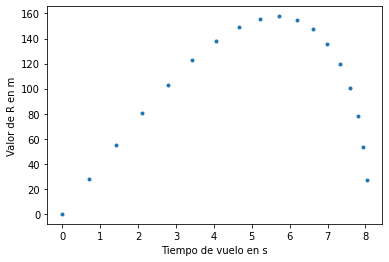

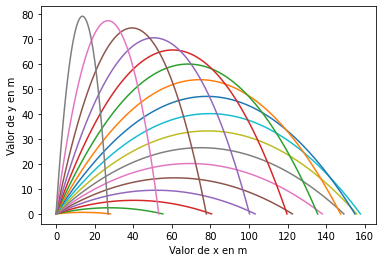

In [90]:
#Puntos 5, 6 y 7

theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)

def y(R,theta, v0, b, g):
    v0x=np.cos(theta)*v0
    v0y=np.sin(theta)*v0
    return (g/b+v0y)*(R/v0x)+(g/b**2)*np.log(1-(R*b)/v0x)


R=[]
for t in theta:
    f =lambda x : y(x, t, 40, 0.009, 9.8)
    a=1
    b=300
    while True:
        if b-a<err:
            R.append((b+a)/2)
            break
        c=(a+b)/2
        if f(c)==0:
            R.append((b+a)/2)
            break
        elif f(c)*f(a)<0:
            b=c
        else:
            a=c

R[0]=0 #ya que el método del punto medio no sirve para el caso theta=0



v0x=lambda t: np.cos(t)*40
v0y=lambda t: np.sin(t)*40

Tv=[-(1/0.009)*np.log(1-(R[i]*0.009)/(v0x(theta[i]))) for i in range(len(theta))]
plt.plot(Tv, R, ".")
plt.xlabel("Tiempo de vuelo en s")
plt.ylabel("Valor de R en m")
plt.show()

def y(t, theta):
    return (1/0.009)*(9.8/0.009+v0y(theta))*(1-np.exp(-0.009*t))-(9.8/0.009)*t
def x(t, theta):
    return (v0x(theta)/0.009)*(1-np.exp(-0.009*t))
for i in range(len(theta)):
    Tv=-(1/0.009)*np.log(1-(R[i]*0.009)/(v0x(theta[i])))
    T=np.linspace(0, Tv, 100)
    plt.plot(x(T, theta[i]), y(T, theta[i]))

plt.xlabel("Valor de x en m")
plt.ylabel("Valor de y en m")
plt.show()
